In [1]:
from keras import models, layers
import keras


class LeNet(models.Sequential):
    def __init__(self, input_shape, nb_classes):
        super().__init__()

        self.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=input_shape, padding="same"))
        self.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
        self.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
        self.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
        self.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
        self.add(layers.Flatten())
        self.add(layers.Dense(84, activation='tanh'))
        self.add(layers.Dense(nb_classes, activation='softmax'))

        self.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD')

In [2]:
import tensorflow as tf
from keras import backend
from keras import datasets
import keras
mnist = tf.keras.datasets.mnist
class DATA():
    def __init__(self):
        num_classes = 10

        (x_train, y_train), (x_test, y_test) = mnist.load_data()
        img_rows, img_cols = x_train.shape[1:]

        if backend.image_data_format() == 'channels_first':
            x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
            x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
            input_shape = (1, img_rows, img_cols)
        else:
            x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
            x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
            input_shape = (img_rows, img_cols, 1)

        x_train = x_train.astype('float32')
        x_test = x_test.astype('float32')
        x_train /= 255
        x_test /= 255

        y_train = keras.utils.to_categorical(y_train, num_classes)
        y_test = keras.utils.to_categorical(y_test, num_classes)

        self.input_shape = input_shape
        self.num_classes = num_classes
        self.x_train, self.y_train = x_train, y_train
        self.x_test, self.y_test = x_test, y_test

In [3]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Train, Test'], loc=0)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/15
375/375 [==============================] - 13s 6ms/step - loss: 0.7800 - val_loss: 0.3683
Epoch 2/15
375/375 [==============================] - 2s 5ms/step - loss: 0.3453 - val_loss: 0.2886
Epoch 3/15
375/375 [==============================] - 2s 5ms/step - loss: 0.2832 - val_loss: 0.2467
Epoch 4/15
375/375 [==============================] - 2s 5ms/step - loss: 0.2459 - val_loss: 0.2203
Epoch 5/15
375/375 [==============================] - 2s 5ms/step - loss: 0.2195 - val_loss: 0.2007
Epoch 6/15
375/375 [==============================] - 2s 5ms/step - loss: 0.1990 - val_loss: 0.1834
Epoch 7/15
375/375 [==============================] - 3s 8ms/step - loss: 0.1822 - val_loss: 0.1689
Epoch 8/15
375/375 [==============================] - 3s 9ms/step - loss: 0.1683 - val_loss: 0.1578
Epoch 9/15
375/375 [==============================] - 2s 5ms/step - loss: 0.1560 - val_loss: 0.1488
Epoch 10/15
375/375 [=============

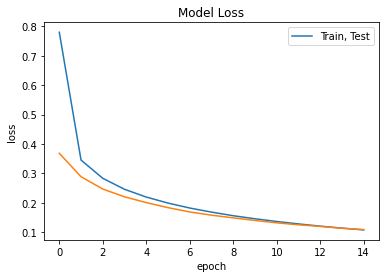

In [4]:

def main():
    batch_size = 128
    epoch = 15

    data = DATA()
    model = LeNet(data.input_shape, data.num_classes)

    hist = model.fit(data.x_train, data.y_train, batch_size=batch_size, epochs=epoch, validation_split=0.2)
    score = model.evaluate(data.x_test, data.y_test, batch_size=batch_size)

    print()
    print('Test Loss= ', score)

    plot_loss(hist)
    plt.show()

if __name__ == '__main__':
    main()

